TRIOS_VIPER_AbsorptionCoefficient_plot.py<br>
Description: convert optical density measured with Trios Viper spectrophotometer to absorption coefficient and plot values in a graph
Author: Martin Rapilly, Geosciences Environnement Toulouse<br>

<br>Download the CSV file from VIPER spectrophotometer. <br>Open the ABSORPTI file with OpenOffice Calc and convert it to excel.<br>
In column Comment2, add a description of the measurement location. For example: Station 1, field measurement <br>
In column Comment3, add the path length in meter. For example: 0.05<br>
The structure should look like this:<br>
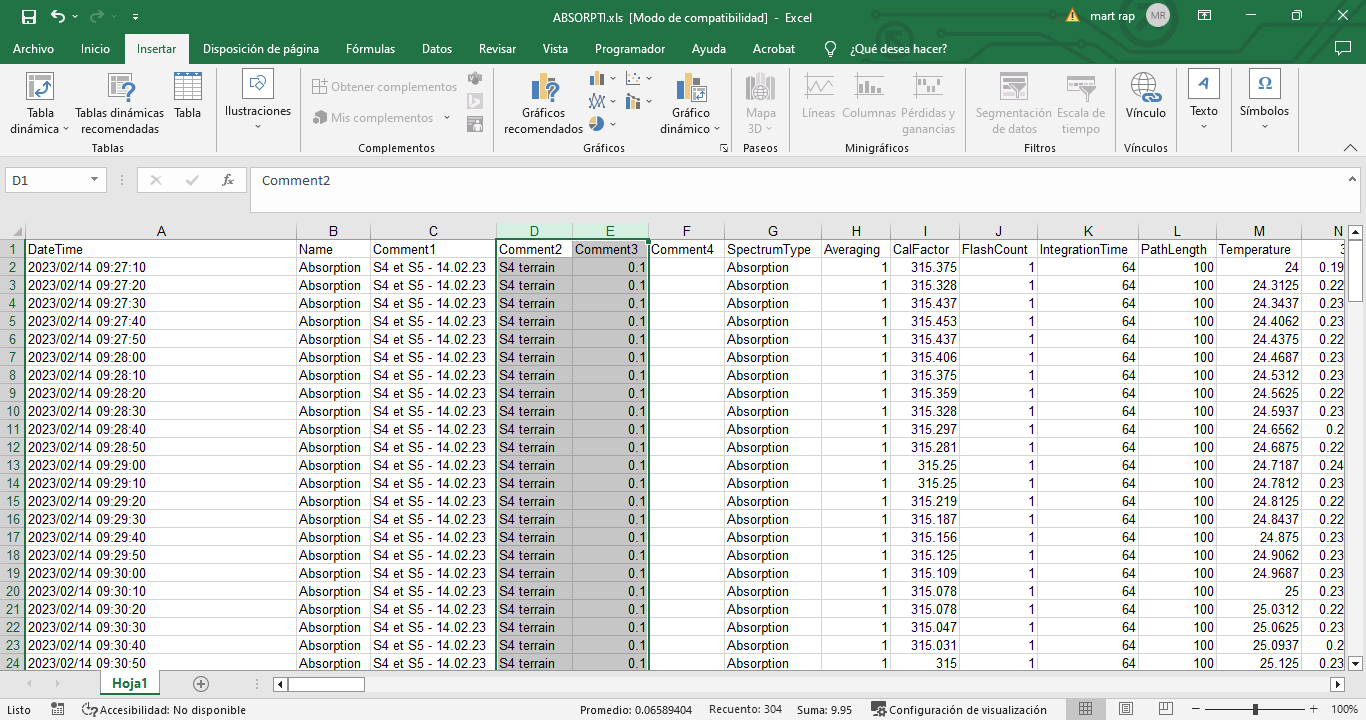

Define the path of your ABSORPTI.xls file and your output folder and run the code

In [1]:
#input file
excel=r"F:\DOCTORADO\Données\mesures biogéochimiques et radiometriques\Résultats Mesures radiométriques terrain\bases de données\backup bases de données radiometres et spectrophotometre 29-11-22\spectrophotometre\ABSORPTI.xls"#first col is wavelength, other columns are different stations/dates/filterSize
#output folder
outPath=r"C:\Users\marti\Downloads"

In [4]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd

#read excel file and convert it to a pandas dataframe
df = pd.read_excel(excel)

#create a list of measurement defined by their descriptions in column2 (station 1, station 2, etc.)
listMeasures=df['Comment2'].unique().tolist()
print (listMeasures)

#create a list of wavelengths that are sampled by the spectrophotometer (contained in the names of columns 13 to 190)
listColNamesWL=[]
for colname in df.columns[13:191]:
    value=float(colname)
    listColNamesWL.append(value)
print ("listColNamesWL",listColNamesWL)

for measure in listMeasures:#loop through all measurements
    print ("measure",measure)
    dfTemp = pd.DataFrame({'wavelength': listColNamesWL})#add list of sampled wavelength to a temporary dataframe as a column named Wavelength
    listAcoeff=[]#create an empty list that will contain the Absorption coefficient for each measurement for all wavelengths
    
    #loop through all lines
    for line in range(df.shape[0]):
        if df.iloc[line]["Comment2"]== measure:#if the description in column Comment2 corresponds to the measurement of interest, proceed
            date=df.iloc[line]["DateTime"][:10]#get date for figure title and file name
            for value in range (13,191):#get values from column 13 to 190 (columns that contain an Optical Density value)
                listAcoeff.append(float(df.iloc[line][value])*2.303/float(df.loc[line]['Comment3']))#converts Optical Density to Absorption Coefficient and save it to a list
            dfTemp[df.iloc[line]["DateTime"]] = listAcoeff#load the previous list to the temporary dataframe as a new column with name set from the date
            listAcoeff=[]#empty the list for next loop
    
    #plot the data
    dfTemp.plot("wavelength",dfTemp.columns[1:],linewidth=0.3,cmap='jet')#plot with column Wavelength for x-axis, all other columns for y-axis (one column per line)         
    plt.title("Absorption coefficient - "+ measure +' - '+ str(date))#define title with description of measurement and date
    plt.xlabel('Wavelength (nm)')#define x-axis label
    plt.ylabel('Absorption coefficient (m-1)')#define y-axis label
    plt.legend('',frameon=False)#remove this line if legend is necessary
    #plt.legend(loc='upper right')#activate this line to set legend position
    plt.tight_layout()
    #plt.show()#activate this line to show plots
    plt.savefig(outPath+"/AbsorptionCoefficient_"+measure+'_'+date.replace("/", "-")+".jpg", dpi=800)#save plot to jpg
    plt.close()#close plot
    del dfTemp#delete temporary dataframe
            

['S4 terrain', 'S5 terrain', 'S4 - 0.22 micrometer', 'S5 - 0.22 micrometer', 'S4 - 0.45 micrometer', 'S5 - 0.45 micrometer']
listColNamesWL [348.8, 350.945, 353.09, 355.235, 357.379, 359.524, 361.667, 363.811, 365.954, 368.097, 370.239, 372.382, 374.523, 376.665, 378.806, 380.947, 383.087, 385.227, 387.367, 389.506, 391.645, 393.784, 395.922, 398.059, 400.197, 402.334, 404.47, 406.606, 408.742, 410.877, 413.012, 415.147, 417.281, 419.414, 421.547, 423.68, 425.812, 427.944, 430.076, 432.207, 434.337, 436.467, 438.597, 440.726, 442.854, 444.982, 447.11, 449.237, 451.364, 453.49, 455.615, 457.74, 459.865, 461.989, 464.113, 466.236, 468.358, 470.48, 472.602, 474.723, 476.843, 478.963, 481.082, 483.201, 485.319, 487.437, 489.554, 491.671, 493.786, 495.902, 498.017, 500.131, 502.244, 504.357, 506.47, 508.582, 510.693, 512.803, 514.913, 517.023, 519.131, 521.239, 523.347, 525.454, 527.56, 529.665, 531.77, 533.875, 535.978, 538.081, 540.183, 542.285, 544.386, 546.486, 548.586, 550.685, 552.783